In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [2]:
import matplotlib.pyplot as plt
from requests import get

In [3]:
def download(url, file_name):
    # open in binary mode
    with open(file_name, "wb") as file:
        # get request
        response = get(url)
        # write to file
        file.write(response.content)

download("https://github.com/tesseract-ocr/tessdata/raw/master/ara.traineddata","ara.traineddata")

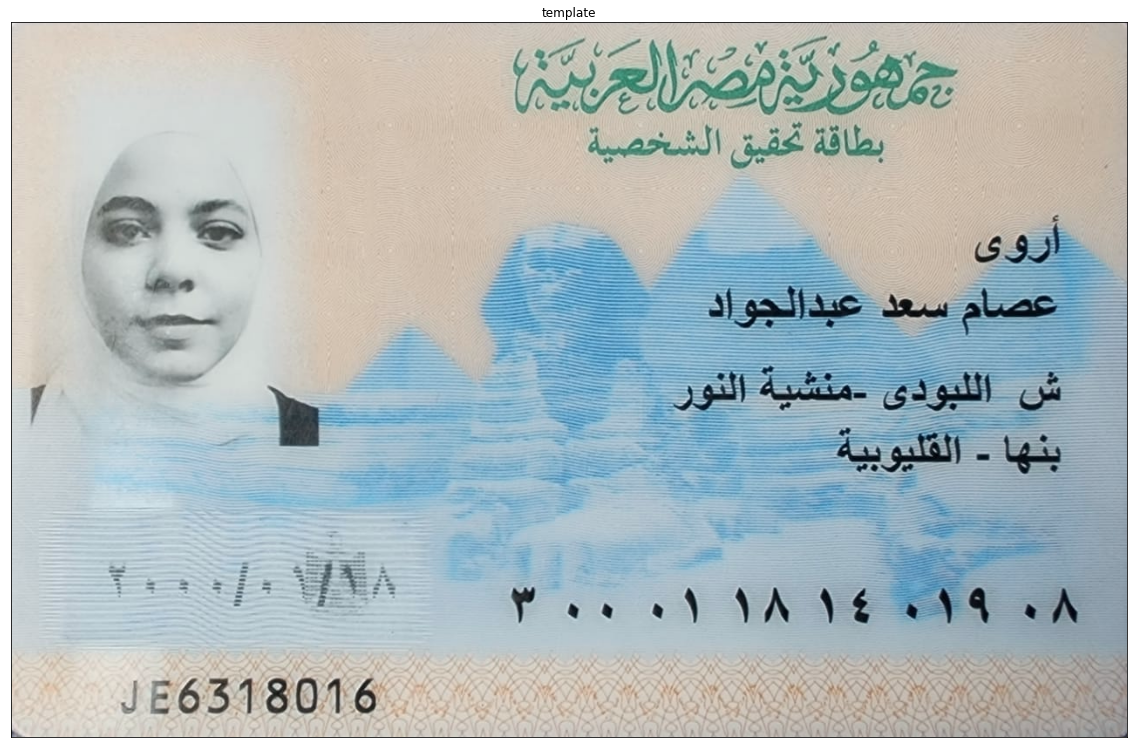

In [4]:
# 4.jpeg - 1.png
import cv2

filename="/content/index.jpg" 
img_cv = cv2.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img_cv,cmap = 'gray')
plt.title('template'), plt.xticks([]), plt.yticks([])

plt.show()

In [5]:
!sudo apt-get install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ara is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [8]:
!sudo apt-get install tesseract-ocr-arabic_numbers

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tesseract-ocr-arabic_numbers


In [ ]:
!sudo apt-get install tesseract-ocr-eng


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (4.00~git24-0e00fe6-1.2).
tesseract-ocr-eng set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [237]:
def crop_image(image):
  font = cv2.FONT_HERSHEY_COMPLEX
  borderPoints = []
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # equ = cv2.equalizeHist(img)
  thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
  cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
  # Find bounding box and extract ROI
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    cv2_imshow(ROI) 
    break
  print(x,y,w,h)
  gray = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)[1]
  cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c,0.015*peri,True)
    if len(approx) == 4:
      screenCnt = approx
      n = approx.ravel() 
      i = 0
      for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
            borderPoints.append([x,y])
        i = i + 1

      break
  cv2.drawContours(ROI, [screenCnt], -1, (0, 255, 0), 3) 
  cv2_imshow(ROI) 
  pts1 = np.float32([borderPoints[0],borderPoints[1],borderPoints[3],borderPoints[2]])
  pts2 = np.float32([[0,0],[0,820],[1280,0],[1280,820]])
  M = cv2.getPerspectiveTransform(pts1,pts2)
  dst = cv2.warpPerspective(ROI,M,(1280,820))
  cv2_imshow(dst)
  cv2.imwrite('dst.jpg', dst)
  cv2.waitKey(0)

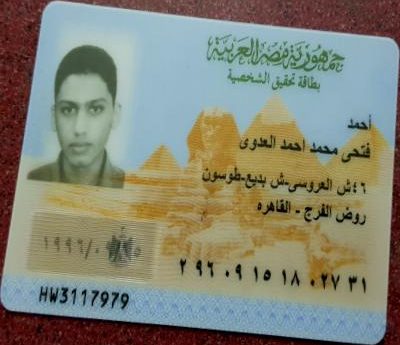

112 169 400 345
[[44, 3], [2, 304], [377, 342], [393, 38]]


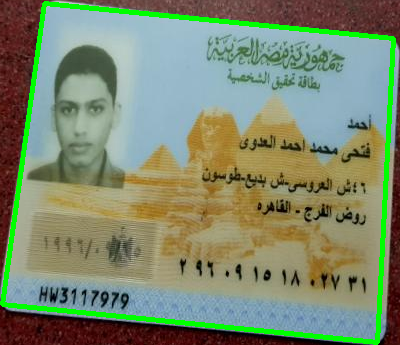

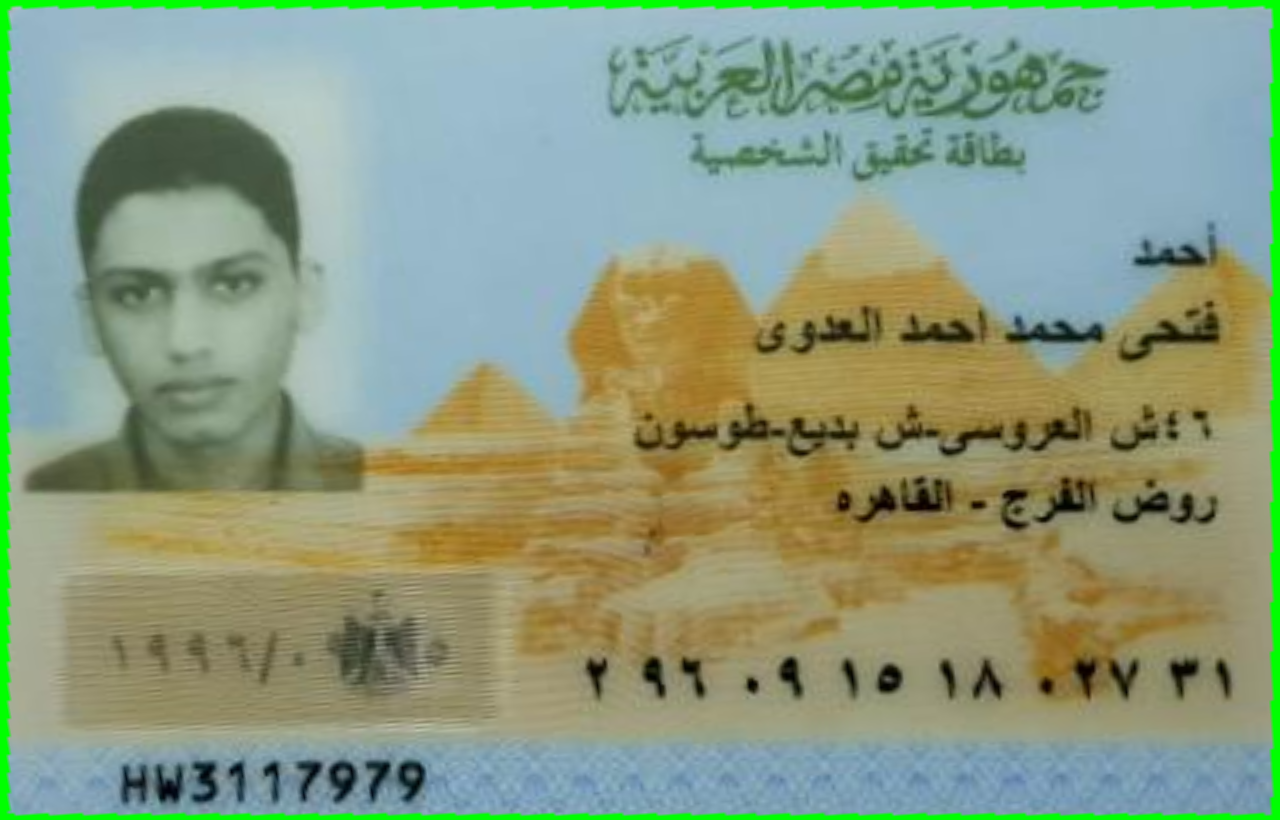

In [238]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# img = cv2.imread('/content/index.jpg')
img_younan = cv2.imread('/content/Ahmed.jpg')
# img_near = cv2.resize(img_younan, (1280, 820), 
#                interpolation = cv2.INTER_LINEAR)
crop_image(img_younan)


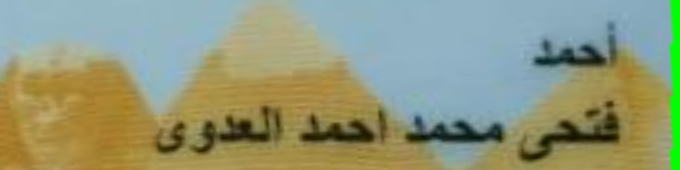

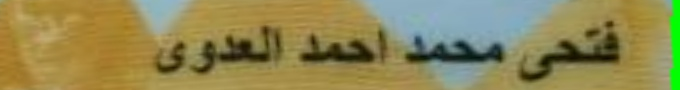

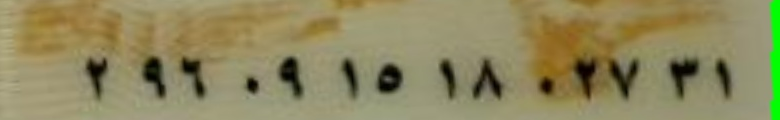

In [228]:
img_2 = cv2.imread('/content/dst.jpg')
# Cropping an image
cropped_image_fitst_name = img_2[200:370, 600:]
cropped_image_last_name = img_2[280:370, 600:]
cropped_image_id = img_2[600:-100, 500:]
# Display cropped image
cv2_imshow(cropped_image_fitst_name)
cv2_imshow(cropped_image_last_name)
cv2_imshow(cropped_image_id)

In [135]:
import numpy as np

def remove_noise(image,median):
    return cv2.medianBlur(image,median)
def dilate(image, dialation):
    kernel = np.ones((dialation,dialation),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

In [136]:
import pytesseract

def preprocess(image, median, dialation):
  grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  img_2 = remove_noise(grayImage, median)
  # img_2 = increase_contrast(img_2)
  img_2 = dilate(img_2, dialation)
  (thresh, blackAndWhiteImage) = cv2.threshold(img_2, 100, 255, cv2.THRESH_BINARY)
  cv2_imshow(blackAndWhiteImage)
  return blackAndWhiteImage

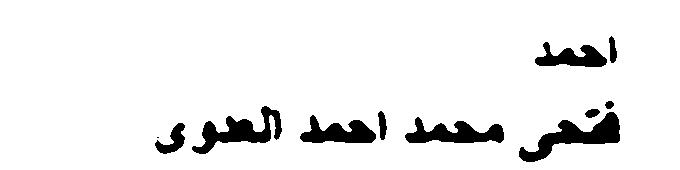

احمد

فتَحَى محمد احمد العدوى



In [229]:
firstName = preprocess(cropped_image_fitst_name, 5, 1)

arabic_text=pytesseract.image_to_string(firstName, lang='ara',config= ".")

print(arabic_text)

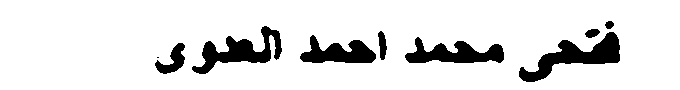

فتَحَى محمد احمد العدوى



In [230]:
secondName = preprocess(cropped_image_last_name, 5, 1)

arabic_text=pytesseract.image_to_string(secondName, lang='ara',config= ".")

print(arabic_text)

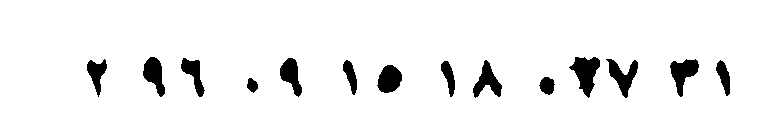

١ ٣ ٧ ٢ ٠ ٨ ١ ٥ ١ ٩ ٠ ٦ ٩ ٢ 
  

In [242]:
id = preprocess(cropped_image_id, 3, 3)

arabic_text=pytesseract.image_to_string(id , lang='arabic_numbers',config= ".")
for i in arabic_text:
  if i != ' ':
    print(i, end=" ")

## Very Important Cells to operate once at some point

In [ ]:
# import os
  
# # Get the list of all files and directories
# # in the root directory
# path = "/usr/share/tesseract-ocr/4.00/tessdata"
# dir_list = os.listdir(path)

In [ ]:
# import os
# import shutil

# os.rename("/content/arabic_numbers.traineddata", "/usr/share/tesseract-ocr/4.00/tessdata/arabic_numbers.traineddata")
# os.replace("/content/arabic_numbers.traineddata", "/usr/share/tesseract-ocr/4.00/tessdata/arabic_numbers.traineddata")
# shutil.move("/content/arabic_numbers.traineddata", "/usr/share/tesseract-ocr/4.00/tessdata/arabic_numbers.traineddata")